In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.options.display.max_columns = None

In [10]:
sns.set_theme(style="whitegrid", palette="pastel")


BASE_PATH = '/home/guillermo/Documents/SINC/RNA/analysis/AEseq2seq/'
DATA_PATH = 'notebooks/from_db/Unet/v1/convolutional_layers'

data_dir = os.path.join(BASE_PATH, DATA_PATH)

In [ ]:
data = pd.read_csv('./from_db/Unet')
metrics = pd.read_csv('./from_db/Unet/v1/convolutional_layers/train_metrics_v2.csv')

FileNotFoundError: [Errno 2] No such file or directory: './from_db/Unet/v1/convolutional_layers/params_best_epoch_v2.csv'

In [ ]:
data.head()

NameError: name 'data' is not defined

In [4]:
data.columns

Index(['run_uuid', 'name', 'best_epoch', 'arc_filters', 'arc_rank',
       'arc_kernel', 'arc_stride_1', 'arc_stride_2', 'arc_num_conv1',
       'arc_num_conv2', 'arc_skip_conn', 'hyp_lr', 'hyp_output_th',
       'hyp_scheduler', 'best_epoch.1', 'train_loss', 'train_Accuracy',
       'train_Accuracy_seq', 'train_F1', 'valid_loss', 'valid_Accuracy',
       'valid_Accuracy_seq', 'valid_F1', 'test_loss', 'test_Accuracy',
       'test_Accuracy_seq', 'test_F1'],
      dtype='object')

In [5]:
metrics['step'] = metrics['step'].astype(int)

In [6]:
data_skips = data[data['arc_skip_conn'] == 1]
data_no_skips = data[data['arc_skip_conn'] == 0]

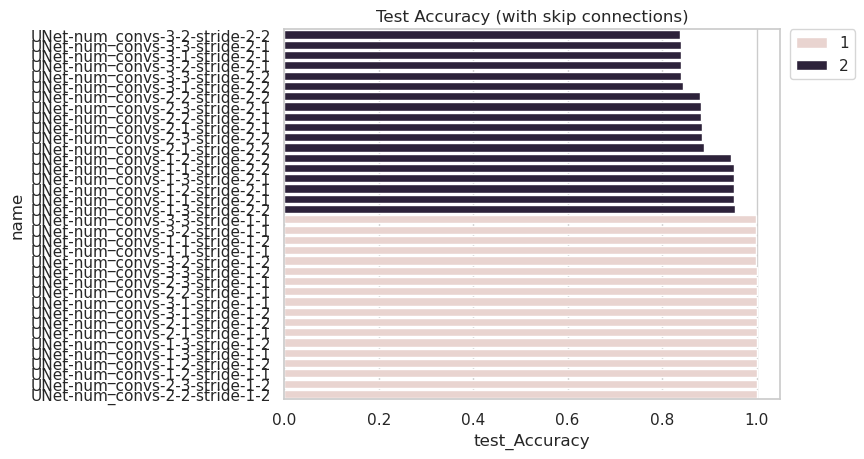

In [7]:
g = sns.barplot(data=data_skips.sort_values(by=['test_Accuracy']), x='test_Accuracy', y='name', hue='arc_stride_1')
g.set_title('Test Accuracy (with skip connections)')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

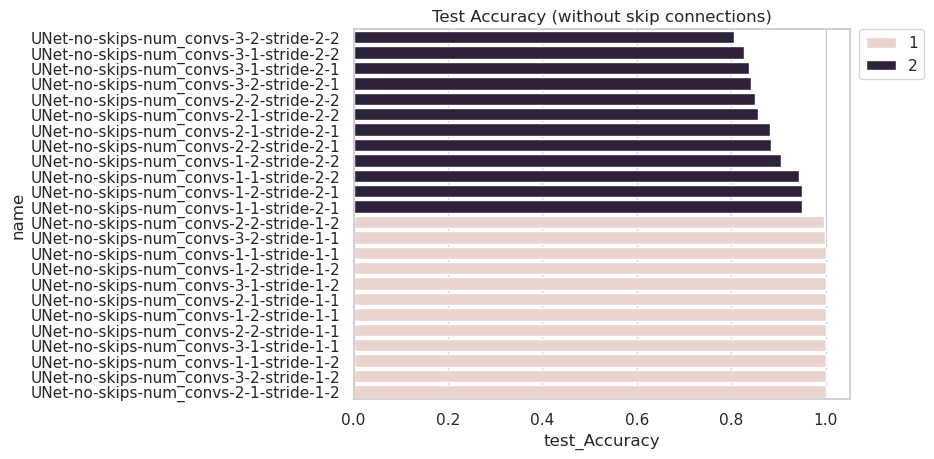

In [8]:
g = sns.barplot(data=data_no_skips.sort_values(by=['test_Accuracy']), x='test_Accuracy', y='name', hue='arc_stride_1')

g.set_title('Test Accuracy (without skip connections)')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

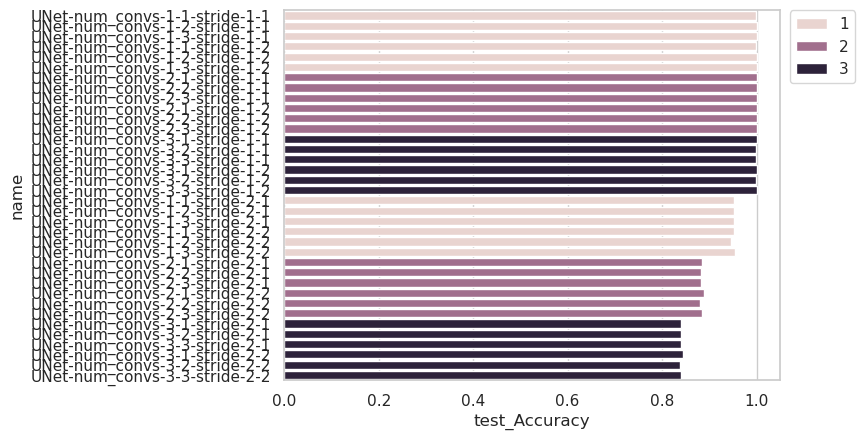

In [9]:
g = sns.barplot(data=data_skips.sort_values(by=['arc_stride_1','arc_num_conv1','arc_stride_2']), x='test_Accuracy', y='name', hue='arc_num_conv1')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

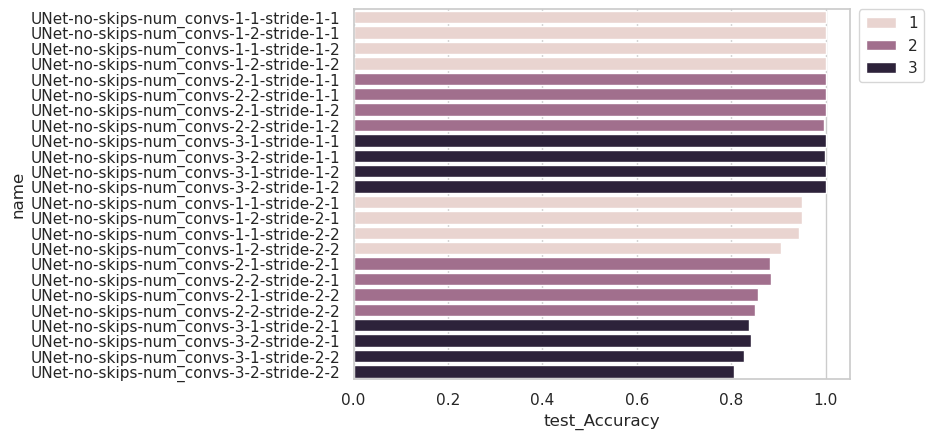

In [10]:
g = sns.barplot(data=data_no_skips.sort_values(by=['arc_stride_1','arc_num_conv1','arc_stride_2']), x='test_Accuracy', y='name', hue='arc_num_conv1')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

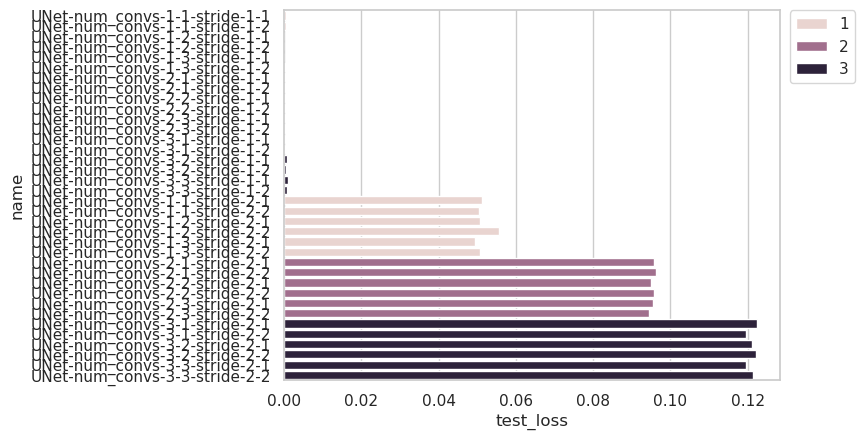

In [11]:
g = sns.barplot(data=data_skips.sort_values(by=['arc_stride_1','arc_num_conv1','arc_num_conv2']), x='test_loss', y='name', hue='arc_num_conv1')
# g.grid()
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

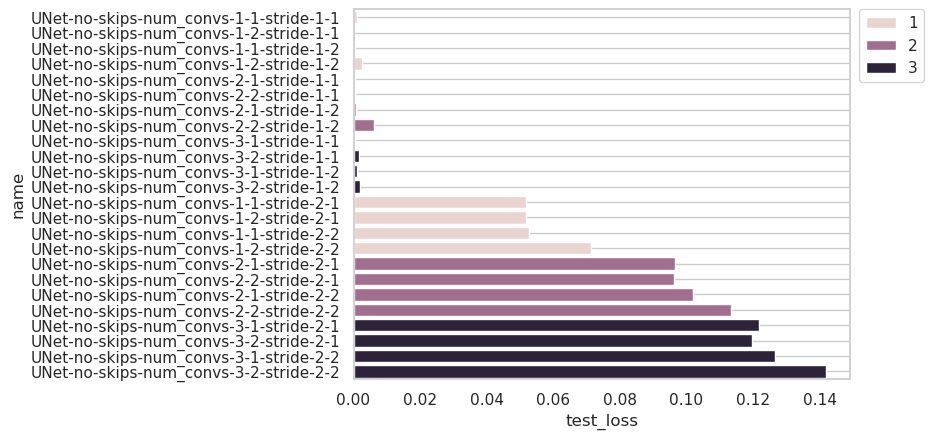

In [12]:
g = sns.barplot(data=data_no_skips.sort_values(by=['arc_stride_1','arc_num_conv1','arc_stride_2']), x='test_loss', y='name', hue='arc_num_conv1')
g.grid()
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [13]:
data.columns

Index(['run_uuid', 'name', 'best_epoch', 'arc_filters', 'arc_rank',
       'arc_kernel', 'arc_stride_1', 'arc_stride_2', 'arc_num_conv1',
       'arc_num_conv2', 'arc_skip_conn', 'hyp_lr', 'hyp_output_th',
       'hyp_scheduler', 'best_epoch.1', 'train_loss', 'train_Accuracy',
       'train_Accuracy_seq', 'train_F1', 'valid_loss', 'valid_Accuracy',
       'valid_Accuracy_seq', 'valid_F1', 'test_loss', 'test_Accuracy',
       'test_Accuracy_seq', 'test_F1'],
      dtype='object')

In [14]:
cols = ['run_uuid', 'arc_stride_1', 'arc_stride_2', 'arc_num_conv1', 'arc_num_conv2']
metrics_skips = pd.merge(metrics, data_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')
metrics_no_skips = pd.merge(metrics, data_no_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')

Text(0.5, 1.0, 'without skip connections')

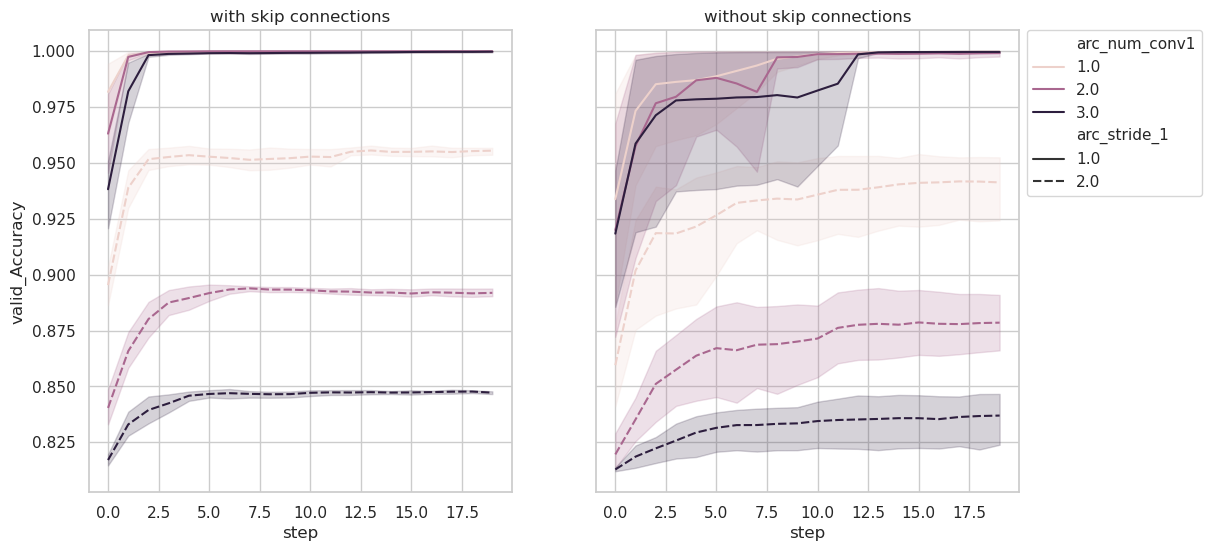

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)
g = sns.lineplot(data=metrics_skips, x='step', y='valid_Accuracy', style='arc_stride_1', hue='arc_num_conv1', ax=ax[0], legend=False)
# g.grid()
g.set_title('with skip connections')

f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_Accuracy', style='arc_stride_1', hue='arc_num_conv1', ax=ax[1])
f.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# f.grid()
f.set_title('without skip connections')

Text(0.5, 1.0, 'without skip connections')

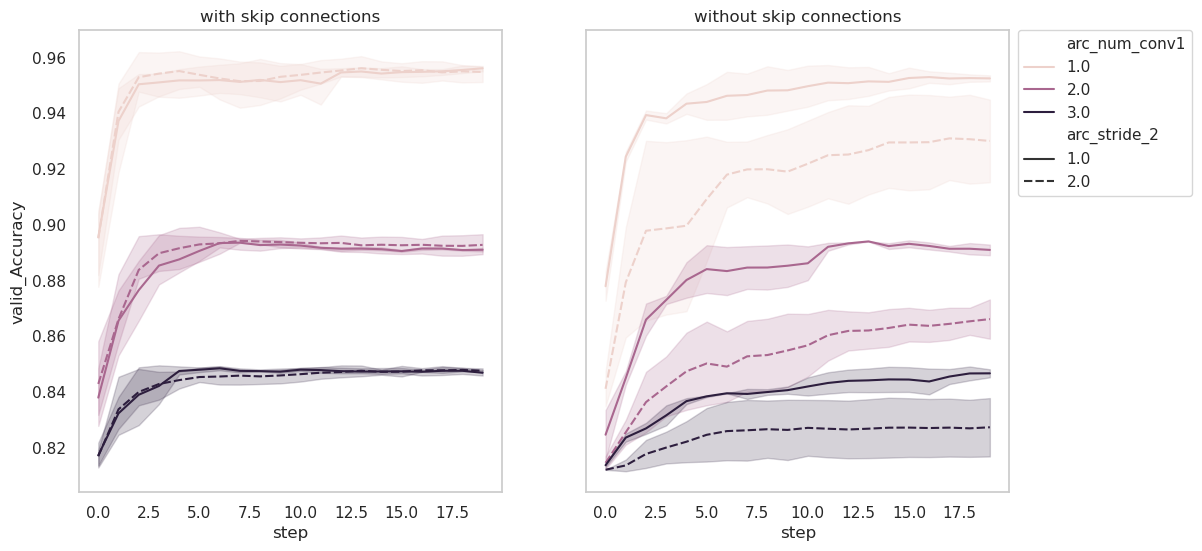

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)
g = sns.lineplot(data=metrics_skips.query('arc_stride_1 == 2'), x='step', y='valid_Accuracy', style='arc_stride_2', hue='arc_num_conv1', ax=ax[0], legend=False)
g.grid()
g.set_title('with skip connections')

f = sns.lineplot(data=metrics_no_skips.query('arc_stride_1 == 2'), x='step', y='valid_Accuracy', style='arc_stride_2', hue='arc_num_conv1', ax=ax[1])
f.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
f.grid()
f.set_title('without skip connections')

In [17]:
g = sns.lineplot(data=metrics.query('arc_stride_1 == 2'), x='step', y='valid_Accuracy', style='arc_stride_2', hue='arc_num_conv1')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.grid()

UndefinedVariableError: name 'arc_stride_1' is not defined